In [11]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
#from haversine import haversine
import xgboost
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
import warnings
from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
warnings.filterwarnings('ignore')

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import Dataset**

In [8]:
##reading file
df=pd.read_csv("/content/drive/MyDrive/NYC Taxi Data.csv")

In [9]:
df.shape

(1458644, 11)

# **Data Exploration**
We will explore the data and modify dataset as per the our requirment for the further analysis of the problem.

In [12]:
pip freeze > requirement.txt

In [14]:
df.shape

(1458644, 11)

There are 1458644 rows and 11 columns

In [15]:
df.head()

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435

**Feature details:**

id - a unique identifier for each trip

vendor_id - a code indicating the provider associated with the trip record

pickup_datetime - date and time when the meter was engaged

dropoff_datetime - date and time when the meter was disengaged

passenger_count - the number of passengers in the vehicle (driver entered value)

pickup_longitude - the longitude where the meter was engaged

pickup_latitude - the latitude where the meter was engaged

dropoff_longitude - the longitude where the meter was disengaged

dropoff_latitude - the latitude where the meter was disengaged

store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip.

Categorizing the features :

Let's divide features into categories:

Geographical: pickup_longitude , pickup_latitude , dropoff_longitude , dropoff_latitude

Time related: pickup_datetime, dropoff_datetime

Identifier: id(not useful for analysis)

Others: vendor_id, passenger_count, store_and_fwd_flag

**Label details:**

trip_duration - duration of the trip in seconds

In [16]:
# checking data-types of variables to identify the numerical and categorical variables
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [18]:
df.describe()

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count  1.458644e+06     1.458644e+06      1.458644e+06     1.458644e+06   
mean   1.534950e+00     1.664530e+00     -7.397349e+01     4.075092e+01   
std    4.987772e-01     1.314242e+00      7.090186e-02     3.288119e-02   
min    1.000000e+00     0.000000e+00     -1.219333e+02     3.435970e+01   
25%    1.000000e+00     1.000000e+00     -7.399187e+01     4.073735e+01   
50%    2.000000e+00     1.000000e+00     -7.398174e+01     4.075410e+01   
75%    2.000000e+00     2.000000e+00     -7.396733e+01     4.076836e+01   
max    2.000000e+00     9.000000e+00     -6.133553e+01     5.188108e+01   

       dropoff_longitude  dropoff_latitude  trip_duration  
count       1.458644e+06      1.458644e+06   1.458644e+06  
mean       -7.397342e+01      4.075180e+01   9.594923e+02  
std         7.064327e-02      3.589056e-02   5.237432e+03  
min        -1.219333e+02      3.218114e+01   1.000000e+00  
25%        -7.399133e+01      4.073588e+01   3.970000e+02  
50%        -7.397975e+01      4.075452e+01   6.620000e+02  
75%        -7.396301e+01      4.076981e+01   1.075000e+03  
max        -6.133553e+01      4.392103e+01   3.526282e+06

Pasenger count varies from 0 to 9. Trip duration has max value of 3526282 seconds almost 979.5 hours and minimum 1 second. This definetly has outliers present so we'll remove them

**NAN or Missing Values:**

It is wise to check for any missing value present in our dataset as many modelling procedures may break down. if there's any missing value present in our dataset the corresponding rows will either have to be removed completely from dataset or the values need to be estimated somehow

In [19]:
#Check for NaN values
df['trip_duration'].isnull().sum()

0

In [20]:
#Check for duplicated values
df.drop_duplicates(inplace=True)
df.shape

(1458644, 11)



*   There are approx 1.5 million records in our dataset.
*   There is no NaN/NULL record in the dataset, So we dont have to impute any record.




In [22]:
df['passenger_count'].value_counts().reset_index()

index  passenger_count
0      1          1033540
1      2           210318
2      5            78088
3      3            59896
4      6            48333
5      4            28404
6      0               60
7      7                3
8      9                1
9      8                1

In [24]:
df[df['passenger_count']==0].count()

id                    60
vendor_id             60
pickup_datetime       60
dropoff_datetime      60
passenger_count       60
pickup_longitude      60
pickup_latitude       60
dropoff_longitude     60
dropoff_latitude      60
store_and_fwd_flag    60
trip_duration         60
dtype: int64

In [25]:
df=df[df['passenger_count']!=0]

In [26]:
df["pickup_datetime"][0]

'2016-03-14 17:24:55'

In [27]:
#Convert timestamp to datetime format to fetch the other details as listed below
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])
df.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id2875421          2 2016-03-14 17:24:55 2016-03-14 17:32:30   
1  id2377394          1 2016-06-12 00:43:35 2016-06-12 00:54:38   
2  id3858529          2 2016-01-19 11:35:24 2016-01-19 12:10:48   
3  id3504673          2 2016-04-06 19:32:31 2016-04-06 19:39:40   
4  id2181028          2 2016-03-26 13:30:55 2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435

**Exploratory Data Analysis**

[Text(0.5, 1.0, 'Distribution Plot for Trip Duration')]

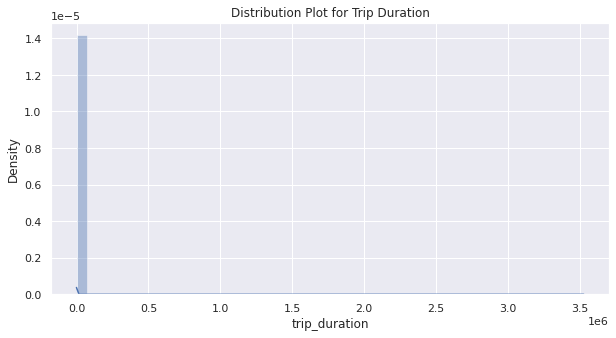

In [29]:
#Dependent variable 'trip_duration'
plt.figure(figsize=(10,5))
sns.distplot(df['trip_duration'],color="b").set(title='Distribution Plot for Trip Duration')

[Text(0.5, 1.0, 'Distribution Plot with Log Transformation for Trip Duration')]

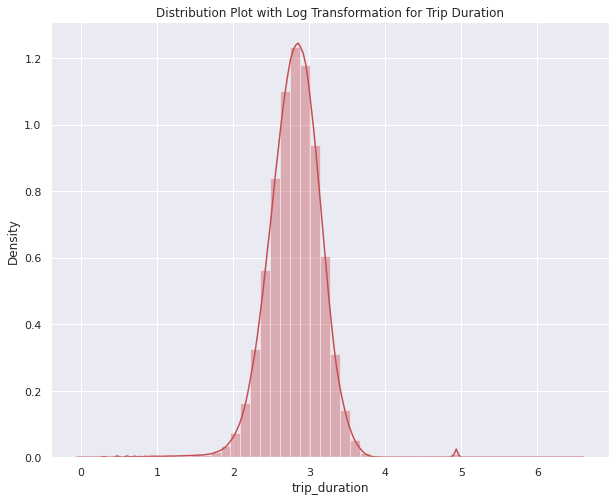

In [30]:
plt.figure(figsize=(10,8))
sns.distplot(np.log10(df['trip_duration']),color="R").set(title='Distribution Plot with Log Transformation for Trip Duration')

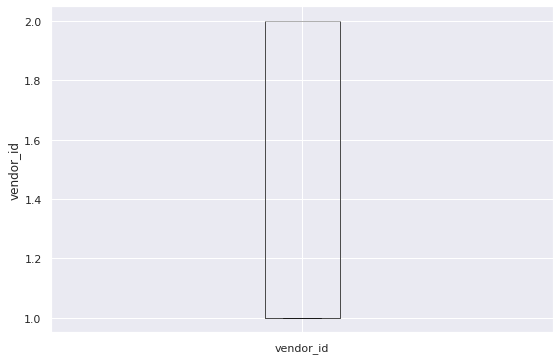

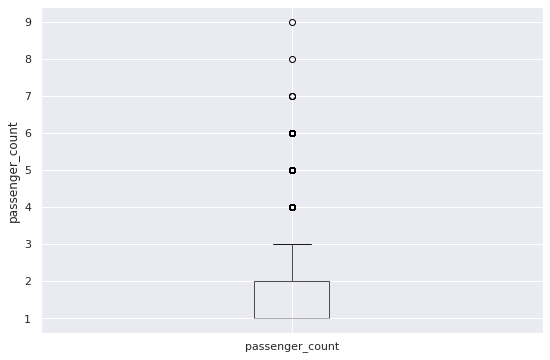

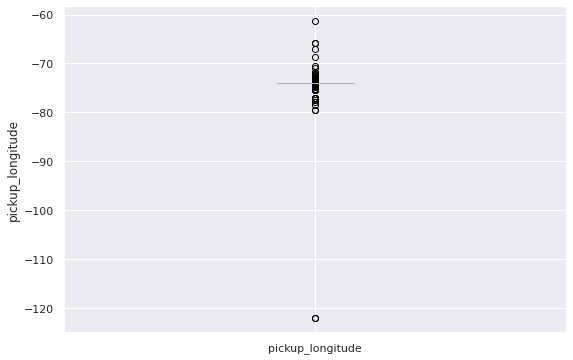

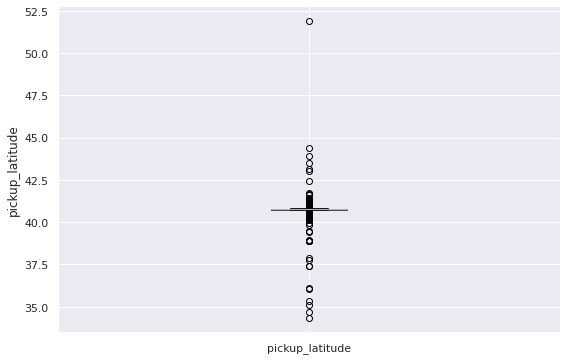

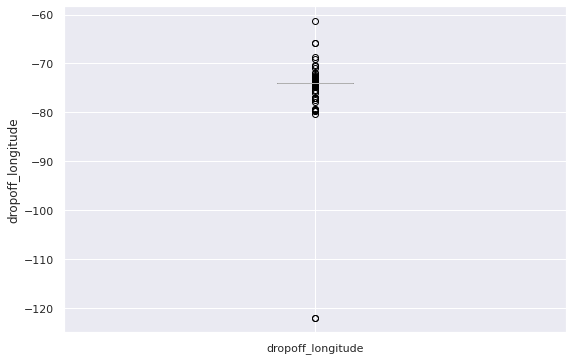

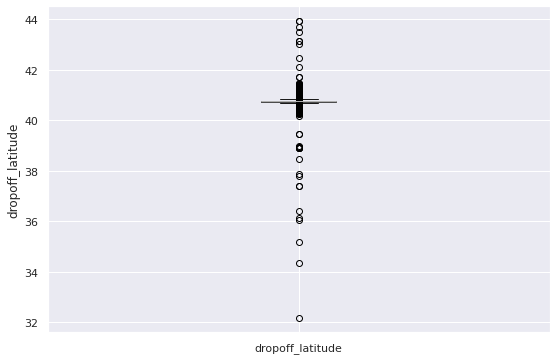

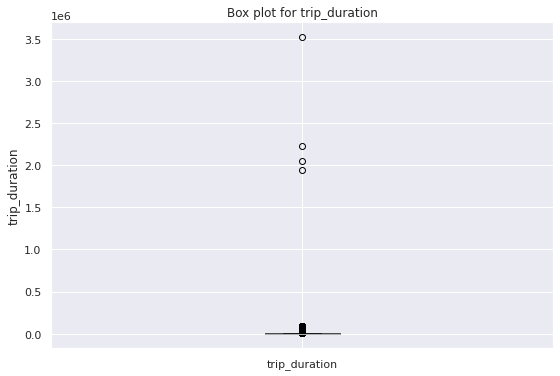

In [32]:
# plot a boxplot for the label by each numerical feature  
for col in df.describe().columns:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  df.boxplot(column = col, ax = ax)
  ax.set_ylabel(col)
plt.title("Box plot for trip_duration")
plt.show()

Vendor ID has no outlier.

In passenger count 4 and more passengers are being treated as outliers.

pickup_longitude and pickup_latitude has outliers as well.

dropoff_longitude and dropoff_latitude has outliers too.

Our target variable trip_duration has alot of outliers

Checking consitency of trip_duration

from the box plot we see that there are few outlier having very large value. we have to remove those outlier. but first let check the consitency of feature "trip duration". To do so we calculate the difference between pick and dropoff time.

In [33]:
# creating a function that will out trip duration from pick and dropoff time
def calculate_trip_duration(pickup,dropoff):
    return (dropoff-pickup).total_seconds()

In [34]:
# creating a feature which stores this calculated trip duration
df['calculate_trip_duration']=df.apply(lambda x: calculate_trip_duration(x['pickup_datetime'],x['dropoff_datetime']),axis=1)

In [35]:
# checking for consistency by comparing trip duration with calculated trip duration
(df['calculate_trip_duration']==df['trip_duration']).value_counts()

True    1458584
dtype: int64

Here, we see that there the trip duration is consistent with the calculated trip duration. so, this large value are purely an outlier.

In [36]:
# Dropping the feature created 
df.drop(['calculate_trip_duration'],axis=1,inplace=True)

To checked for outlier we segregate our dependent variable into different categories i.e trip whose duration is less then 1min, within 10mins,within hour,within day, within two day and more than two day

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

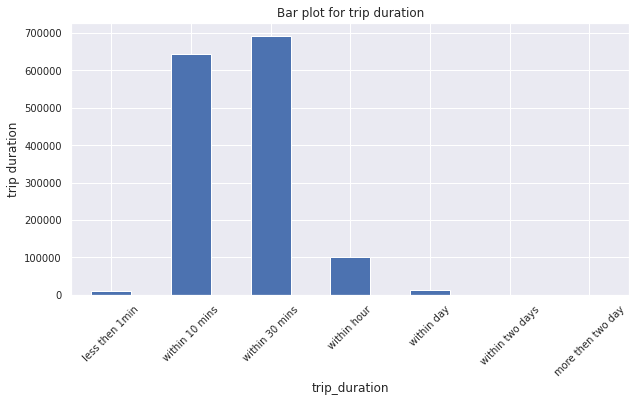

In [37]:
# segregrating the dependent variable into different categories.
plt.figure(figsize=[10,5])
labels=['less then 1min','within 10 mins','within 30 mins','within hour','within day','within two days','more then two day']
df.groupby(pd.cut(df['trip_duration'],bins=[0,60,600,1800,3600,86400,86400*2,10000000],labels=labels))['trip_duration'].count().plot(kind='bar',fontsize=10)
plt.title("Bar plot for trip duration")
plt.ylabel("trip counts")
plt.ylabel("trip duration")
plt.xticks(rotation=45)

In [38]:
numeric_features =df.describe().columns
numeric_features

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration'],
      dtype='object')

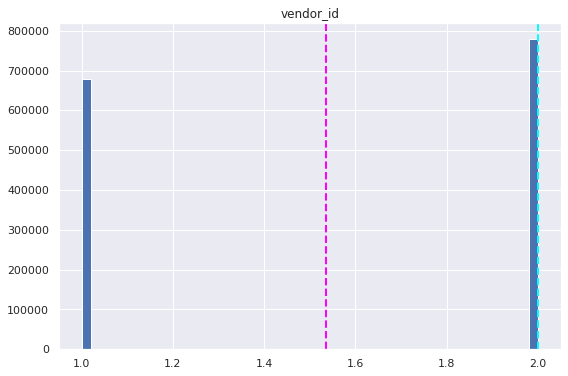

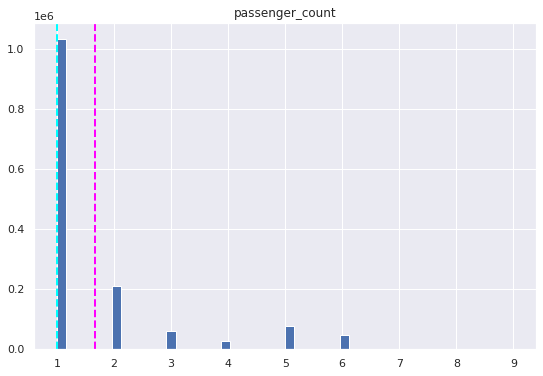

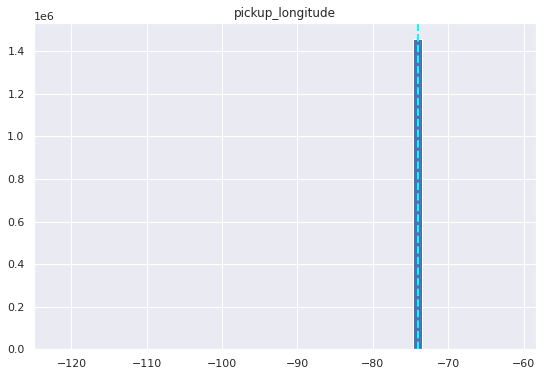

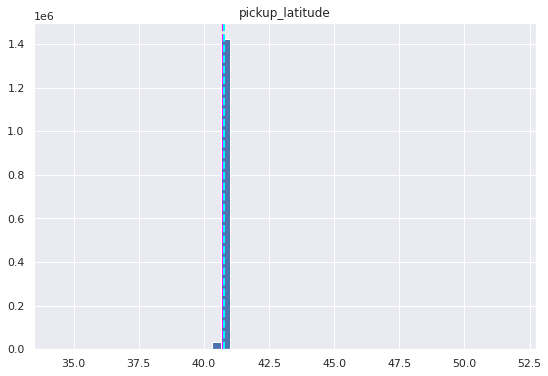

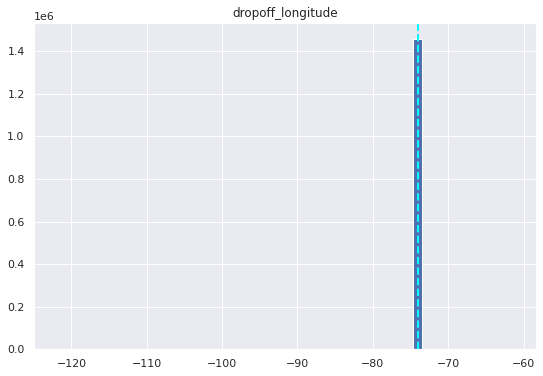

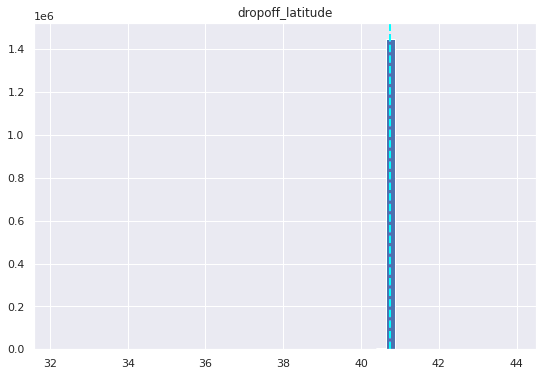

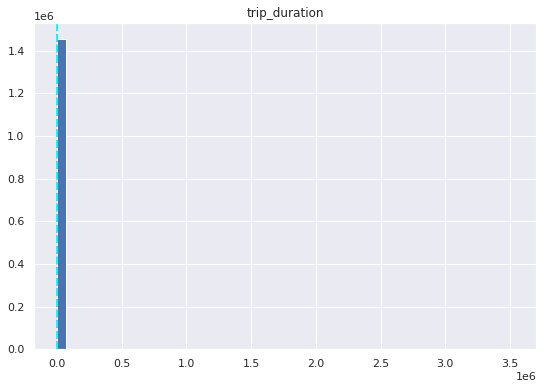

In [40]:
# plot a bar plot for each numerical feature count
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

In [41]:
df.describe().columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration'],
      dtype='object')

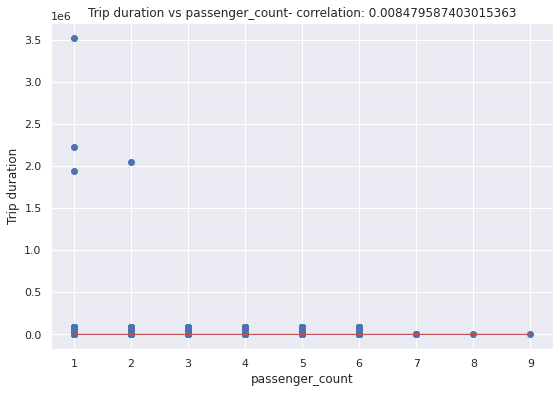

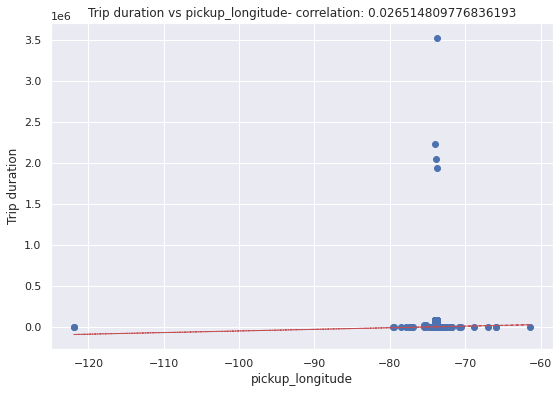

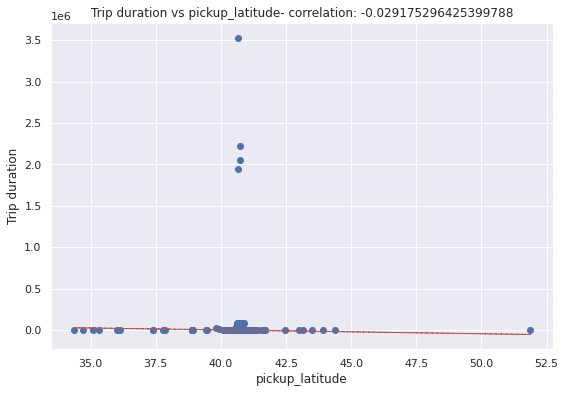

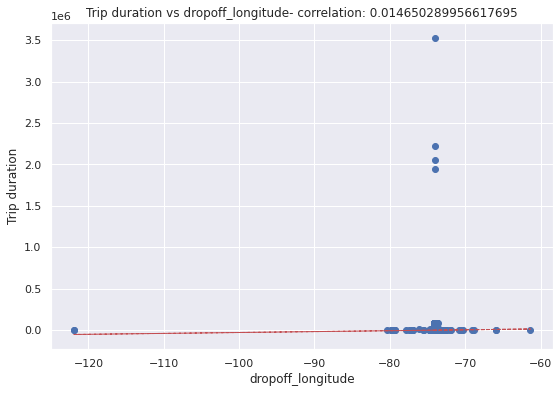

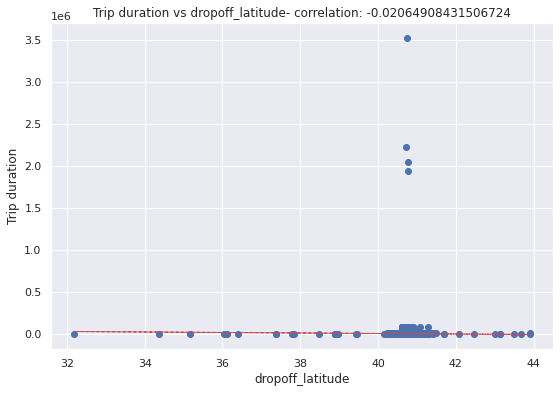

In [42]:
for col in numeric_features[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['trip_duration']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Trip duration')
    ax.set_title('Trip duration vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['trip_duration'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()


**Map Visualization**

We shall visualize the Taxi pickup locations by placing long and lat marker on the MAP of the US. So that we can analyze below questions:

Are all pickups constrained to NYC and it's surrounding areas?
Is there any unusual location of the pickup?
Are the lat long constrained to the land area of the US and nowhere else?

(-74.03, -73.75)

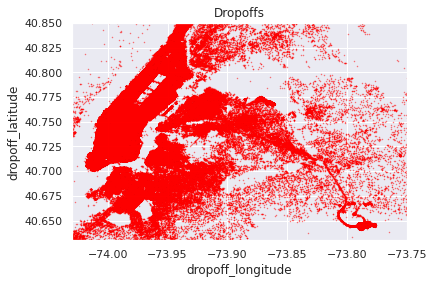

In [44]:
city_long_border = [-74.03, -73.75]
city_lat_border = [40.63,40.85]

df.plot(kind='scatter', x='dropoff_longitude',y='dropoff_latitude',
          color='Red',
          s=0.2, alpha =.6)
plt.title('Dropoffs')

plt.ylim(city_lat_border)
plt.xlim(city_long_border)

(-74.03, -73.75)

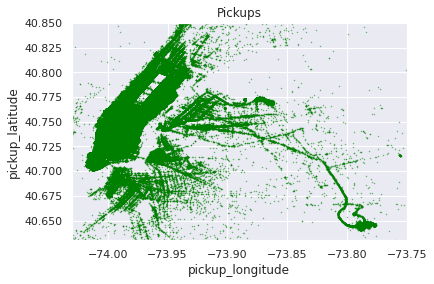

In [45]:
city_long_border = [-74.03, -73.75]
city_lat_border = [40.63,40.85]

df.plot(kind='scatter', x='pickup_longitude',y='pickup_latitude',
          color='green',
          s=0.2, alpha =.6)
plt.title('Pickups')

plt.ylim(city_lat_border)
plt.xlim(city_long_border)

In [47]:
def select_within_boundingbox(df, BB):
    return ((df["pickup_longitude"] >= BB[0]) & (nyc_df["pickup_longitude"] <= BB[1]) & 
            (df["pickup_latitude"] >= BB[2]) & (nyc_df["pickup_latitude"] <= BB[3]) &
            (df["dropoff_longitude"] >= BB[0]) & (nyc_df["dropoff_longitude"] <= BB[1]) &
            (df["dropoff_latitude"] >= BB[2]) & (nyc_df["dropoff_latitude"] <= BB[3]))
BB = (-74.3, -73.0, 40.6, 41.7)

**FEATURE ENGINEERING**
Feature engineering is a machine learning technique that leverages data to create new variables that aren’t in the training set. It can produce new features for both supervised and unsupervised learning, with the goal of simplifying and speeding up data transformations while also enhancing model accuracy.

In [48]:
#Calculate and assign new columns to the dataframe such as pickupday,
#dropoffday which will help us to gain more insights from the data.
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()
df.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id2875421          2 2016-03-14 17:24:55 2016-03-14 17:32:30   
1  id2377394          1 2016-06-12 00:43:35 2016-06-12 00:54:38   
2  id3858529          2 2016-01-19 11:35:24 2016-01-19 12:10:48   
3  id3504673          2 2016-04-06 19:32:31 2016-04-06 19:39:40   
4  id2181028          2 2016-03-26 13:30:55 2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration pickup_day dropoff_day  
0         40.765602                  N            455     Monday      Monday  
1         40.731152                  N            663     Sunday      Sunday  
2         40.710087                  N           2124    Tuesday     Tuesday  
3         40.706718                  N            429  Wednesday   Wednesday  
4         40.782520                  N            435   Saturday    Saturday

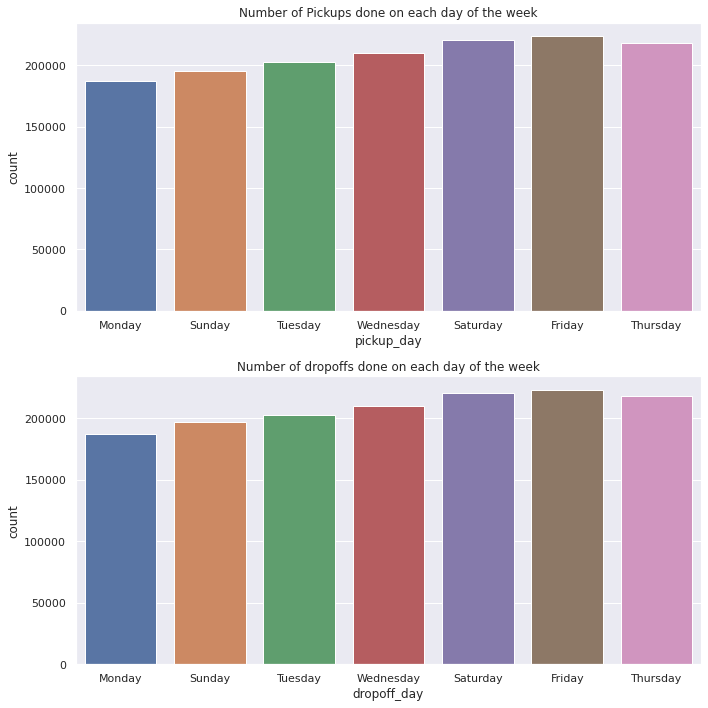

In [49]:
#Number of Pickups and Dropoff on each day of the week
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.countplot(x='pickup_day',data=df,ax=ax[0])
ax[0].set_title('Number of Pickups done on each day of the week')
sns.countplot(x='dropoff_day',data=df,ax=ax[1])
ax[1].set_title('Number of dropoffs done on each day of the week')

plt.tight_layout()

Thus we see most trips were taken on Friday and Monday being the least. The distribution of trip duration with the days of the week is something to look into as well.

In [51]:
bins=np.array([0,1800,3600,5400,7200,90000])
df['duration_time']=pd.cut(df.trip_duration,bins,labels=["< 5", "5-10", "10-15","15-20",">20"])

In [52]:
import datetime
def timezone(x):
    if x>=datetime.time(4, 0, 1) and x <=datetime.time(10, 0, 0):
        return 'morning'
    elif x>=datetime.time(10, 0, 1) and x <=datetime.time(16, 0, 0):
        return 'midday'
    elif x>=datetime.time(16, 0, 1) and x <=datetime.time(22, 0, 0):
        return 'evening'
    elif x>=datetime.time(22, 0, 1) or x <=datetime.time(4, 0, 0):
        return 'late night'
    
df['pickup_timezone']=df['pickup_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )
df['dropoff_timezone']=df['dropoff_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )

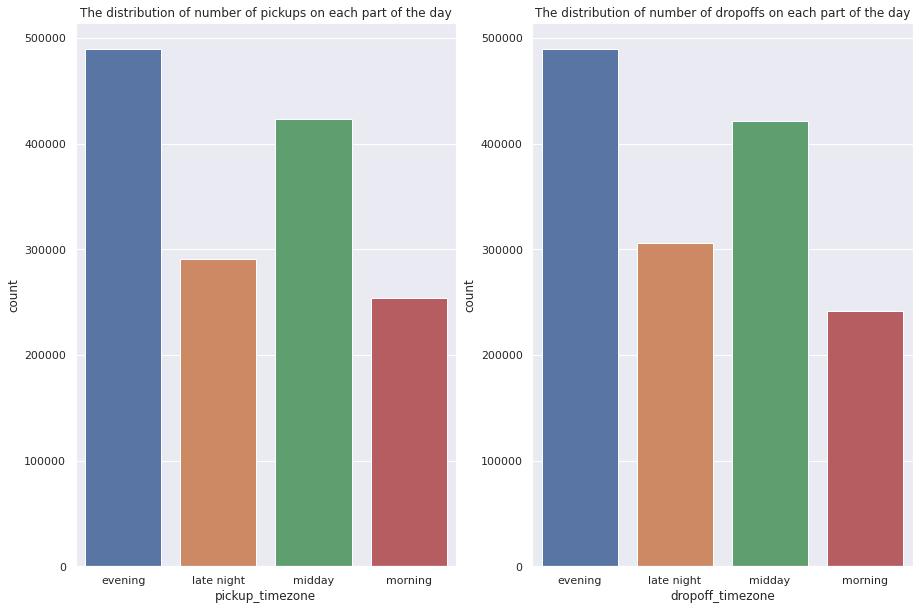

In [54]:
# Distribution of the no of Pickups and Dropoffs in a day
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,10))
sns.countplot(x='pickup_timezone',data=df,ax=ax[0])
ax[0].set_title('The distribution of number of pickups on each part of the day')
sns.countplot(x='dropoff_timezone',data=df,ax=ax[1])
ax[1].set_title('The distribution of number of dropoffs on each part of the day')
plt.show()


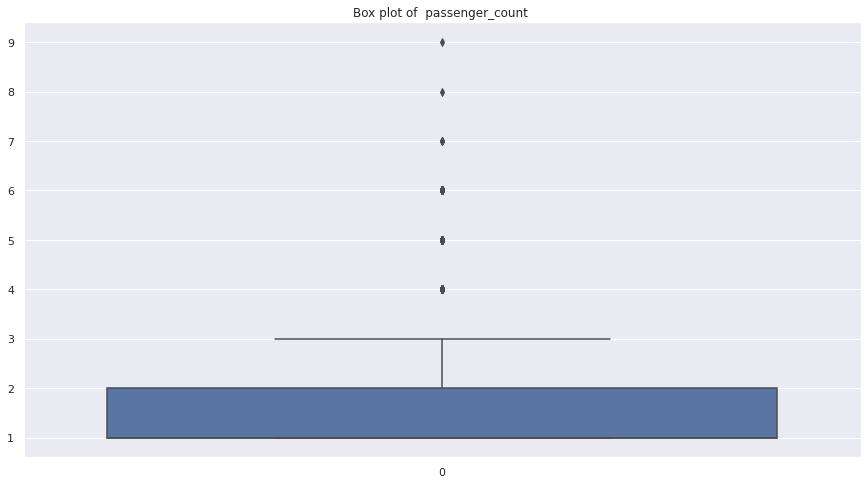

In [65]:
plt.figure(figsize=(15,8))
plt.title("Box plot of  passenger_count ")
ax = sns.boxplot(data=df['passenger_count'])

In [67]:
percentile_q1_passenger_count = np.percentile(df['passenger_count'],25)
print(percentile_q1_passenger_count)
percentile_q2_passenger_count = np.percentile(df['passenger_count'],50)
print(percentile_q2_passenger_count)
percentile_q3_passenger_count = np.percentile(df['passenger_count'],75)
print(percentile_q3_passenger_count)

1.0
1.0
2.0


In [68]:
iqr=percentile_q3_passenger_count - percentile_q1_passenger_count
lower_limit_outlier_passenger_count=percentile_q1_passenger_count-1.5*iqr
upper_limit_outlier_passenger_count=percentile_q3_passenger_count+1.5*iqr

print("lower limit for outlier  :",lower_limit_outlier_passenger_count)
print("Upper limit for outlier  :",upper_limit_outlier_passenger_count)

lower limit for outlier  : -0.5
Upper limit for outlier  : 3.5


In [69]:
df=df[df['passenger_count']>0]
df=df[df['passenger_count']<upper_limit_outlier_passenger_count]

In [71]:
df.shape

(1303754, 16)

In [73]:
#convert dattime in "%Y-%m-%d %H:%M:%S" format
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"], format="%Y-%m-%d %H:%M:%S")

In [74]:
df['Day']=df['pickup_datetime'].dt.day_name()

In [75]:
#Calculate and assign new columns to the dataframe such as year,
#month ,day_num,hour and minute which will help us to gain more insights from the data.
df["year"] = df["pickup_datetime"].apply(lambda x: x.year)
df["month"] = df["pickup_datetime"].apply(lambda x: x.month)
df["day_num"] = df["pickup_datetime"].apply(lambda x: x.day)
df["hour"] = df["pickup_datetime"].apply(lambda x: x.hour)
df["minute"] = df["pickup_datetime"].apply(lambda x: x.minute)

In [76]:
df.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id2875421          2 2016-03-14 17:24:55 2016-03-14 17:32:30   
1  id2377394          1 2016-06-12 00:43:35 2016-06-12 00:54:38   
2  id3858529          2 2016-01-19 11:35:24 2016-01-19 12:10:48   
3  id3504673          2 2016-04-06 19:32:31 2016-04-06 19:39:40   
4  id2181028          2 2016-03-26 13:30:55 2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  ...  dropoff_day duration_time  \
0         40.765602                  N  ...       Monday           < 5   
1         40.731152                  N  ...       Sunday           < 5   
2         40.710087                  N  ...      Tuesday          5-10   
3         40.706718                  N  ...    Wednesday           < 5   
4         40.782520                  N  ...     Saturday           < 5   

  pickup_timezone dropoff_timezone        Day  year month  day_num  hour  \
0         evening          evening     Monday  2016     3       14    17   
1      late night       late night     Sunday  2016     6       12     0   
2          midday           midday    Tuesday  2016     1       19    11   
3         evening          evening  Wednesday  2016     4        6    19   
4          midday           midday   Saturday  2016     3       26    13   

   minute  
0      24  
1      43  
2      35  
3      32  
4      30  

[5 rows x 22 columns]

Converting trip duration into hours.

Taking log of our distance for normalisation of data.

Taking log of our trip duration as well to normalize it's data too.

In [78]:
df['trip_duration_hour']=df['trip_duration']/3600

df['log_trip_duration']=np.log(df.trip_duration_hour)

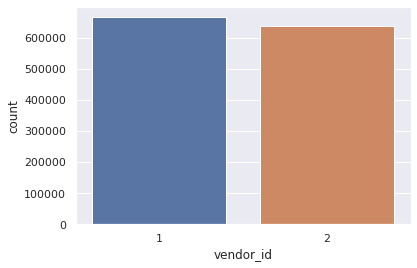

In [80]:
#Distribution of the vendor id for the taxi trip
sns.countplot(x='vendor_id',data=df)

though both the vendors seems to have almost equal market share. But Vendor 1 is evidently more famous among the population as per the above graph.

**Store_and_fwd_flag**

This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip.

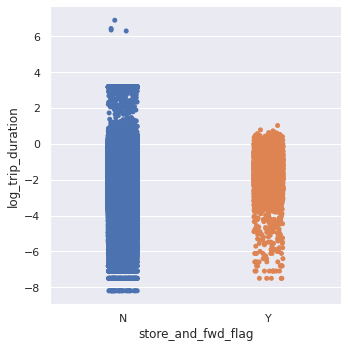

In [81]:
#Distribution of the Store and Fwd flag
sns.catplot(x="store_and_fwd_flag", y="log_trip_duration",kind="strip",data=df)

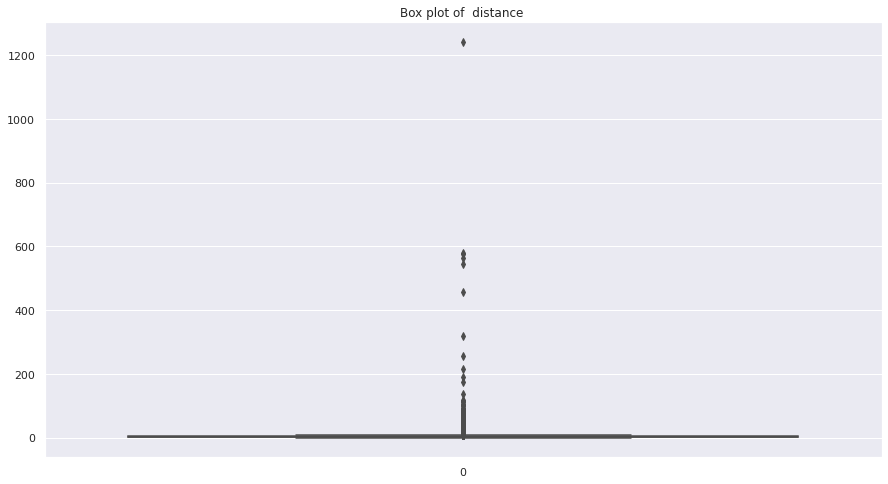

In [92]:
plt.figure(figsize=(15,8))
plt.title("Box plot of  distance ")
ax = sns.boxplot(data=df['distance'], orient="v")

In [94]:
percentile_q1 = np.percentile(df['distance'],25)
print(percentile_q1)
percentile_q2 = np.percentile(df['distance'],50)
print(percentile_q2)
percentile_q3 = np.percentile(df['distance'],75)
print(percentile_q3)

1.2308042405896669
2.092377644235924
3.867520112166981


In [95]:
iqr=percentile_q3 - percentile_q1
lower_limit_outlier=percentile_q1-1.5*iqr
upper_limit_outlier=percentile_q3+1.5*iqr

print("lower limit for outlier  :",lower_limit_outlier)
print("Upper limit for outlier  :",upper_limit_outlier)

lower limit for outlier  : -2.724269566776304
Upper limit for outlier  : 7.822593919532952


In [97]:
df=df[df['distance']>lower_limit_outlier]
df=df[df['distance']<upper_limit_outlier]
df.shape

(1178239, 25)

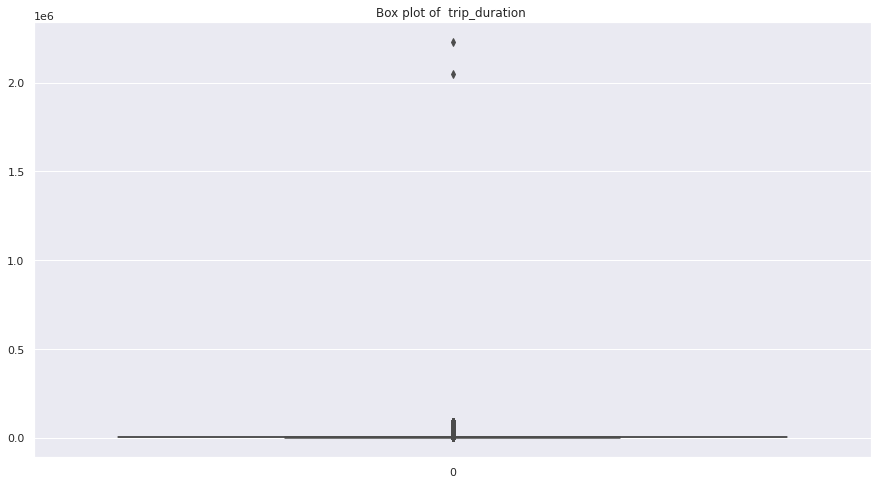

In [98]:
plt.figure(figsize=(15,8))
plt.title("Box plot of  trip_duration ")
ax = sns.boxplot(data=df['trip_duration'], orient="v")

In [100]:
percentile_q1_trip_duration = np.percentile(df['trip_duration'],25)
print(percentile_q1_trip_duration)
percentile_q2_trip_duration = np.percentile(df['trip_duration'],50)
print(percentile_q2_trip_duration)
percentile_q3_trip_duration = np.percentile(df['trip_duration'],75)
print(percentile_q3_trip_duration)

373.0
604.0
930.0


In [101]:
iqr=percentile_q3_trip_duration - percentile_q1_trip_duration
lower_limit_outlier_trip_duration=percentile_q1_trip_duration-1.5*iqr
upper_limit_outlier_trip_duration=percentile_q3_trip_duration+1.5*iqr

print("lower limit for outlier  :",lower_limit_outlier_trip_duration)
print("Upper limit for outlier  :",upper_limit_outlier_trip_duration)

lower limit for outlier  : -462.5
Upper limit for outlier  : 1765.5


In [103]:
df=df[df['trip_duration']>0]
df=df[df['trip_duration']<upper_limit_outlier_trip_duration]

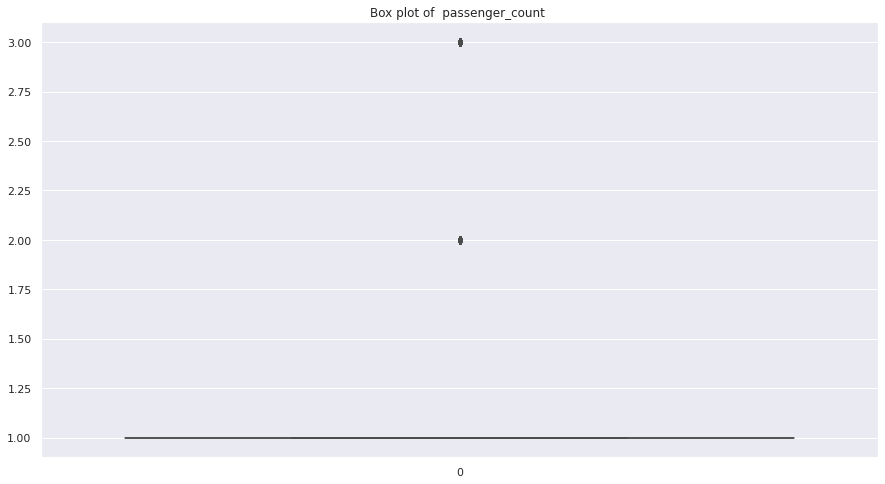

In [105]:
plt.figure(figsize=(15,8))
plt.title("Box plot of  passenger_count ")
ax = sns.boxplot(data=df['passenger_count'])

Observations:

Above result shows that only about 1% of the trip details were stored in the vehicle first before sending it to the server. This might have occured because of the following reasons:
Outstation trips didn't had proper connection at the time when trip completes.
Temporary loss of signals while the trip was about to finish
Inconsistent signal reception over the trip duration.
The GPS or mobile device battery was down when the trip finished.
Let's check further

In [86]:
!pip install haversine
from haversine import haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [88]:
def calc_distance(df):
    pickup = (df['pickup_latitude'], df['pickup_longitude'])
    drop = (df['dropoff_latitude'], df['dropoff_longitude'])
    return haversine(pickup, drop)
#Calculate distance and assign new column to the dataframe.
df["distance"] = df.apply(lambda x: calc_distance(x),axis=1)

**Bivariate Analysis**

Bivariate analysis is used to find out if there is a relationship between two sets of values. It usually involves the variables X and Y.

Bivariate analysis is used to find out if there is a relationship between two sets of values. It usually involves the variables X and Y.

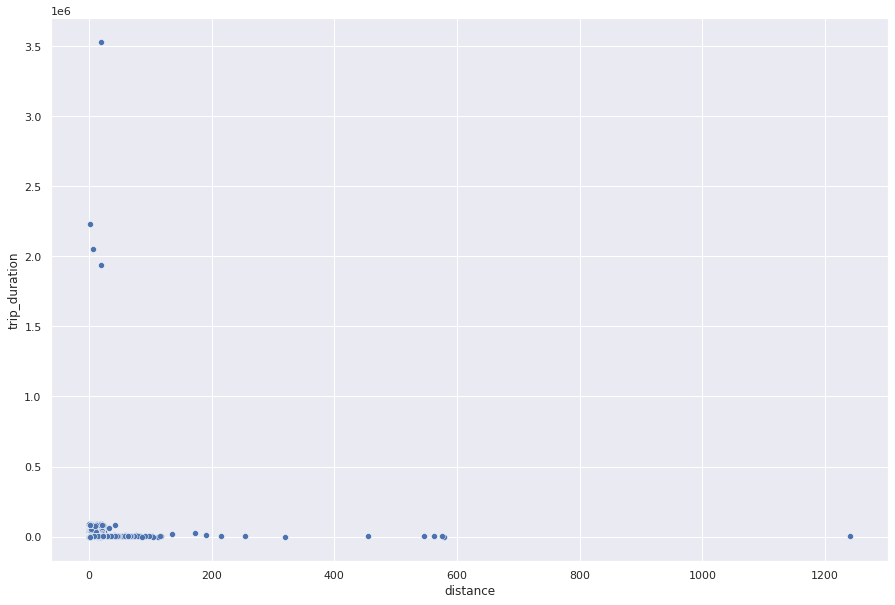

In [90]:
fig = plt.figure(figsize=(15, 10))
sns.scatterplot(x='distance',y='trip_duration',data=df)


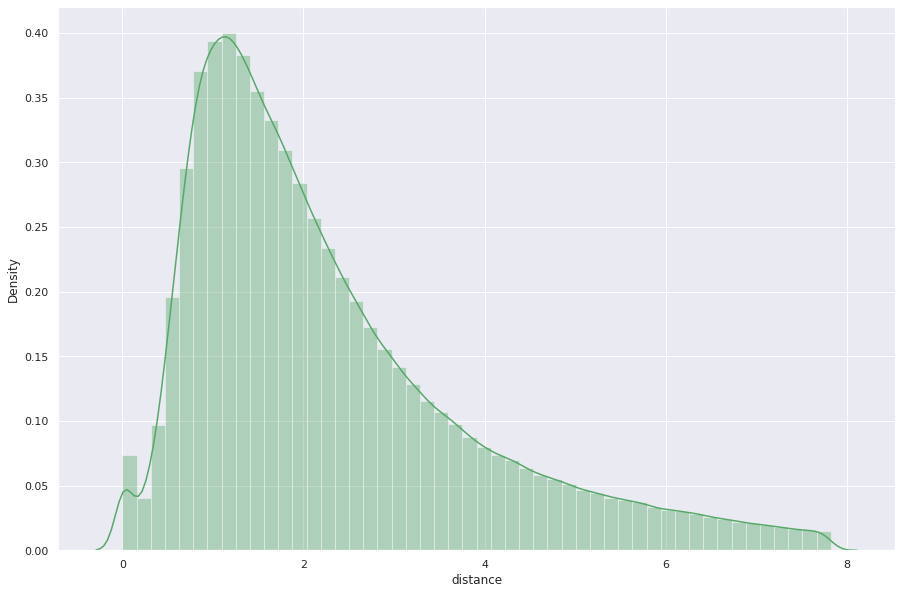

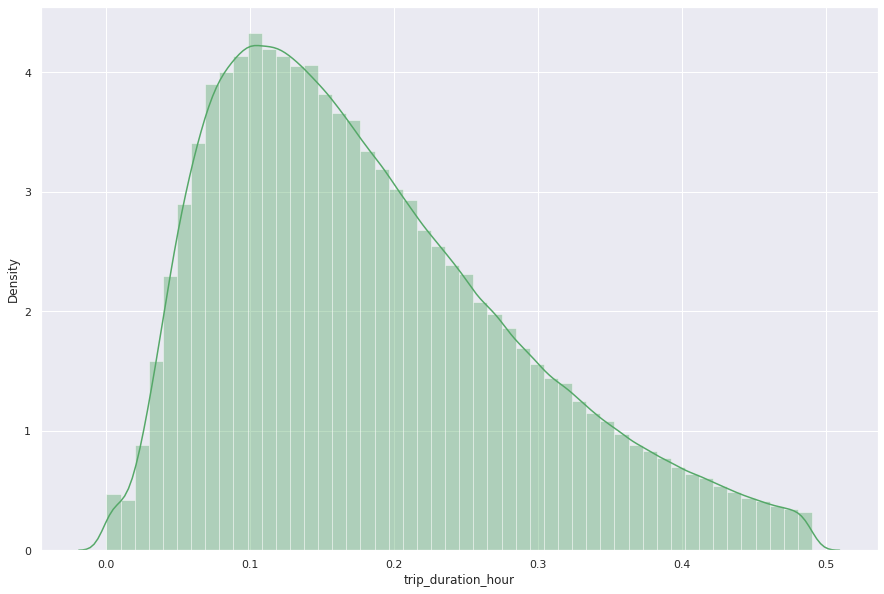

In [107]:
sample=['distance','trip_duration_hour']
for i in sample:
  plt.figure(figsize=(15,10))
  sns.distplot(df[i],color="g")

In [109]:
#Dummify all the categorical features like "store_and_fwd_flag, Day" except the label i.e. "trip_duration"
df= pd.get_dummies(df, columns=["store_and_fwd_flag", "Day"], prefix=["store_and_fwd_flag",'Day'])

In [111]:
#Feature for the Machine learning models
features=(['vendor_id','passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','distance','month','hour','minute',
          'store_and_fwd_flag_N','store_and_fwd_flag_Y','Day_Friday','Day_Monday','Day_Saturday','Day_Sunday','Day_Thursday','Day_Tuesday','Day_Wednesday'])

In [112]:
newdata=['vendor_id','passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','distance','month','hour','minute',
          'store_and_fwd_flag_N','store_and_fwd_flag_Y','Day_Friday','Day_Monday','Day_Saturday','Day_Sunday','Day_Thursday','Day_Tuesday','Day_Wednesday','trip_duration_hour']
trip_data=df[newdata]

In [113]:
df.shape


(1142137, 32)

**Split Data**

Lets split our data first before scaling the features

In [114]:
#For Standarization  apply z-score
from scipy.stats import zscore
#Train test split
X = df[features].apply(zscore)[:100000]
y=df['trip_duration_hour'][:100000]

In [115]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

In [116]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [117]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(80000, 19) (80000,)
(20000, 19) (20000,)


**Correlation Analysis**

Correlation analysis is a method of statistical evaluation used to study the strength of a relationship between two or more, numerically measured, continuous variables. This analysis is useful when we need to check if there are possible connections between variables. We will utilize Heatmap for our analysis.

**Heatmap**

A heatmap is a graphical representation of data that uses a system of color-coding to represent statistical relationship between different values.

Let's plot the relationship between the features of the Feature selection group first

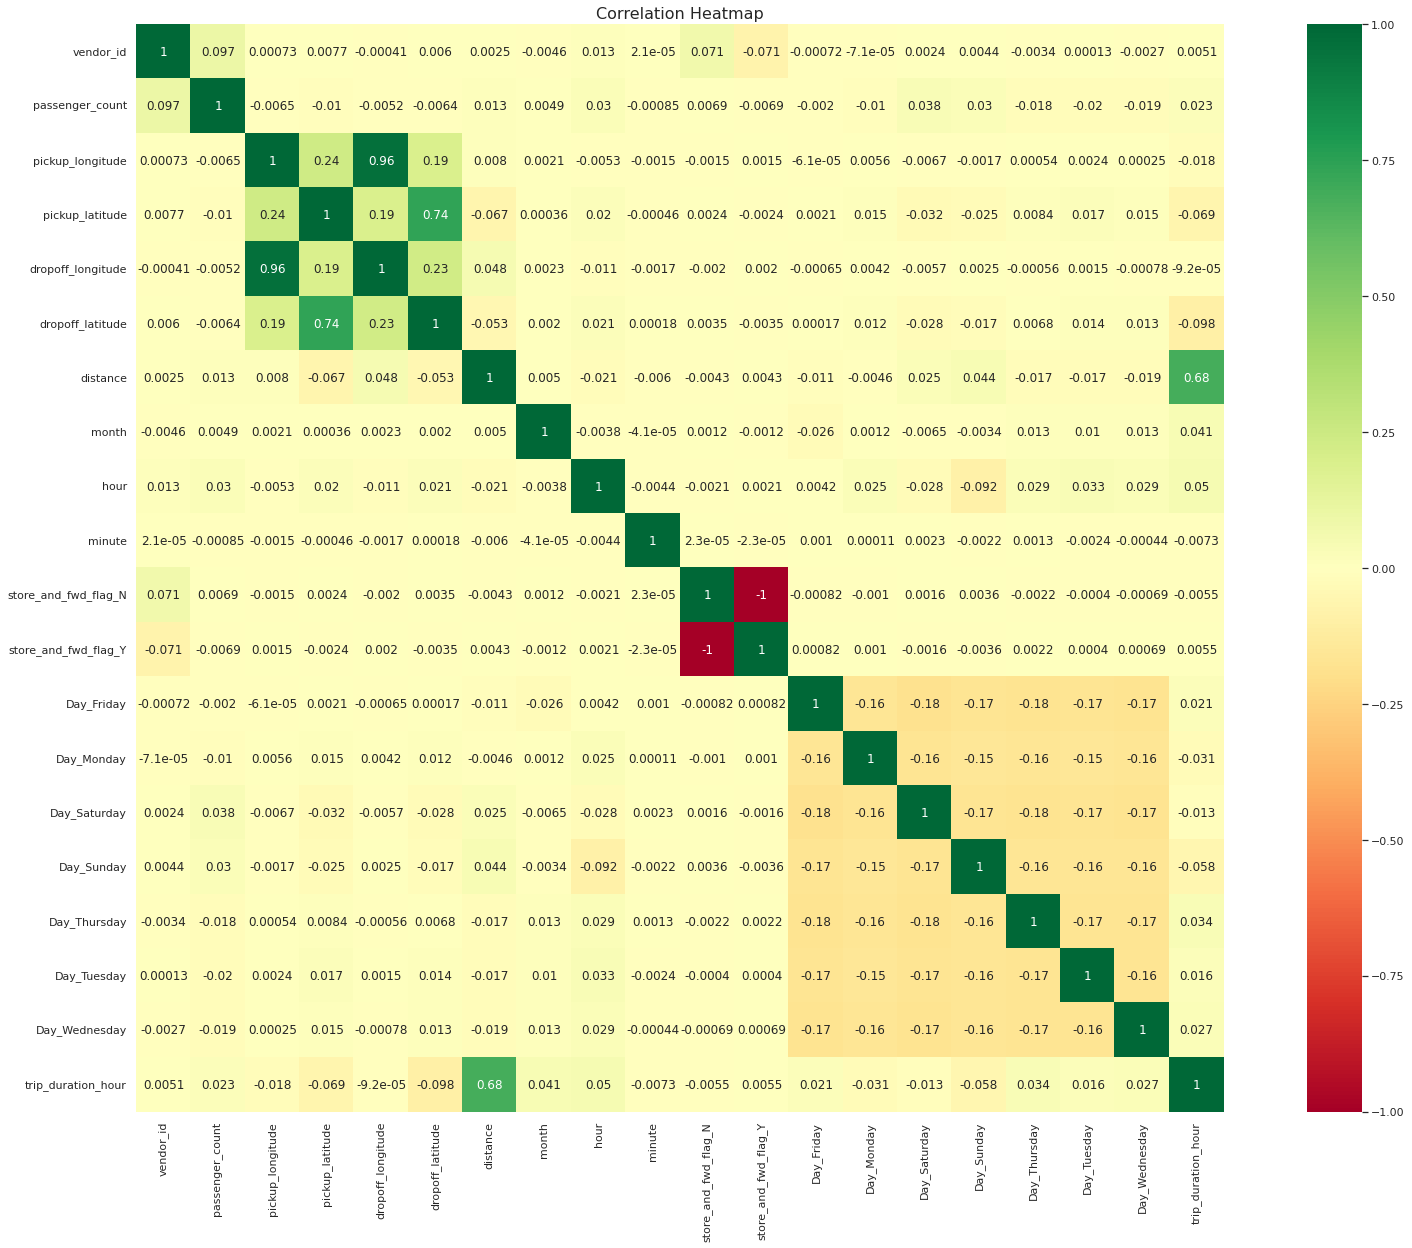

In [118]:
plt.figure (figsize= (30,20))

sns.heatmap(trip_data.corr(), cmap='RdYlGn', annot=True,vmin=-1, vmax=1, square=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [119]:
from matplotlib import legend
# Function for evaluation metric for regression
def EvaluationMetric(Xt,yt,yp,disp="on"):
  ''' Take the different set of parameter and prints evaluation metrics '''
  MSE=round(mean_squared_error(y_true=yt,y_pred=yp),4)
  RMSE=(np.sqrt(MSE))
  R2=(r2_score(y_true=yt,y_pred=yp))
  Adjusted_R2=(1-(1-r2_score(yt, yp))*((Xt.shape[0]-1)/(Xt.shape[0]-Xt.shape[1]-1)))
  if disp=="on":
    print("MSE :",MSE,"RMSE :", RMSE)
    print("R2 :",R2,"Adjusted R2 :",Adjusted_R2)

  #Plotting Actual and Predicted Values
  plt.figure(figsize=(18,6))
  plt.plot((yp)[:100]) 
  plt.plot((np.array(yt)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted Time Duration')


  
  return (MSE,RMSE,R2,Adjusted_R2) 

**Linear Regression**

Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

In [120]:
# Instance the linear regression object
reg = LinearRegression().fit(X_train, y_train)

In [121]:
reg.score(X_train, y_train)

0.49600165307640565

In [122]:
y_pred_train = reg.predict(X_train)

In [123]:
y_pred_test = reg.predict(X_test)

MSE : 0.0055 RMSE : 0.07416198487095663
R2 : 0.49600165307640565 Adjusted R2 : 0.4958819235366264


(0.0055, 0.07416198487095663, 0.49600165307640565, 0.4958819235366264)

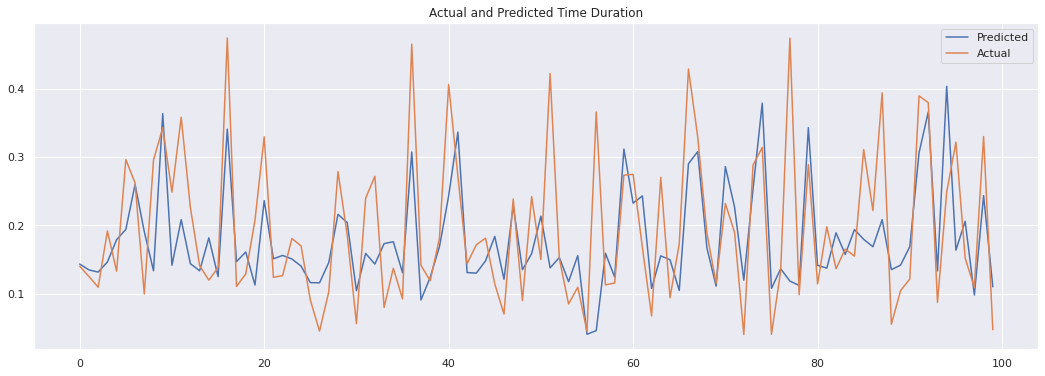

In [124]:
#Evaluation metrics for Train set
EvaluationMetric(X_train,y_train,y_pred_train)

MSE : 0.0055 RMSE : 0.07416198487095663
R2 : 0.501861257970867 Adjusted R2 : 0.501387552460429


(0.0055, 0.07416198487095663, 0.501861257970867, 0.501387552460429)

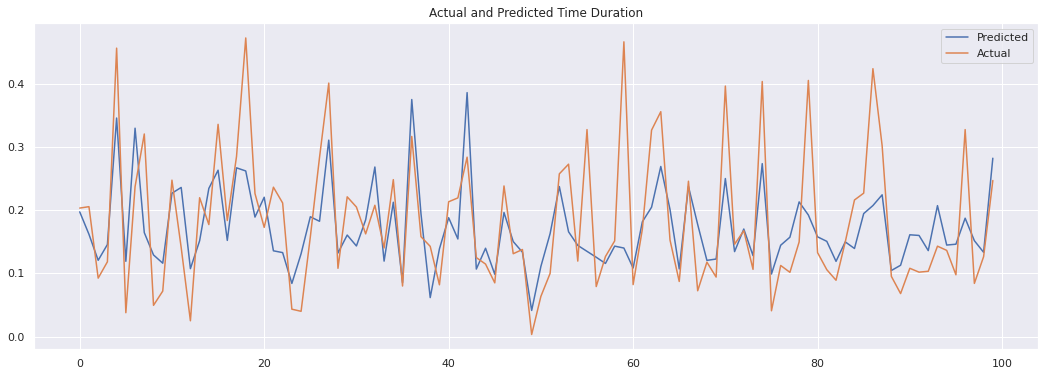

In [125]:
#Evaluation metrics for Test set
EvaluationMetric(X_test,y_test,y_pred_test)

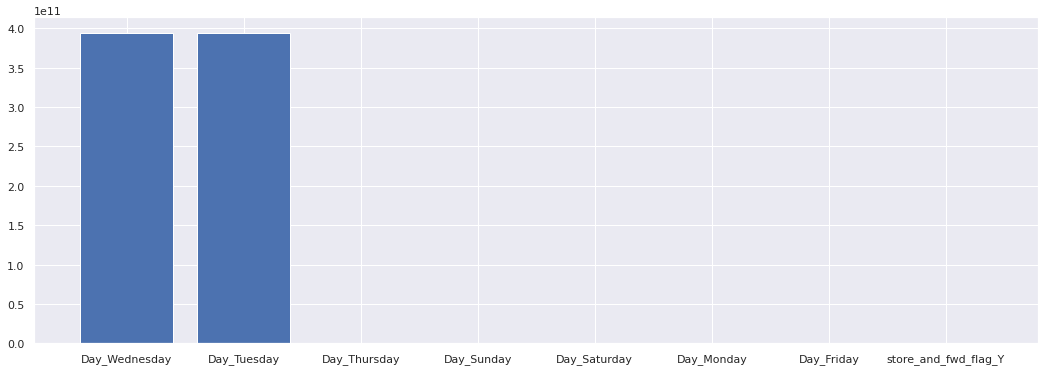

In [126]:
#Feature Importances for Linear Regression

plt.figure(figsize=(18,6))

importance=reg.coef_
importance=np.sort(importance)
feature=features
indices=np.argsort(importance)
indices=indices[:10:-1]
#plotting the features and their score in ascending order
sns.set_style("darkgrid")
plt.bar(range(len(indices)),importance[indices])
plt.xticks(range(len(indices)),[feature[i] for i in indices])
plt.show()

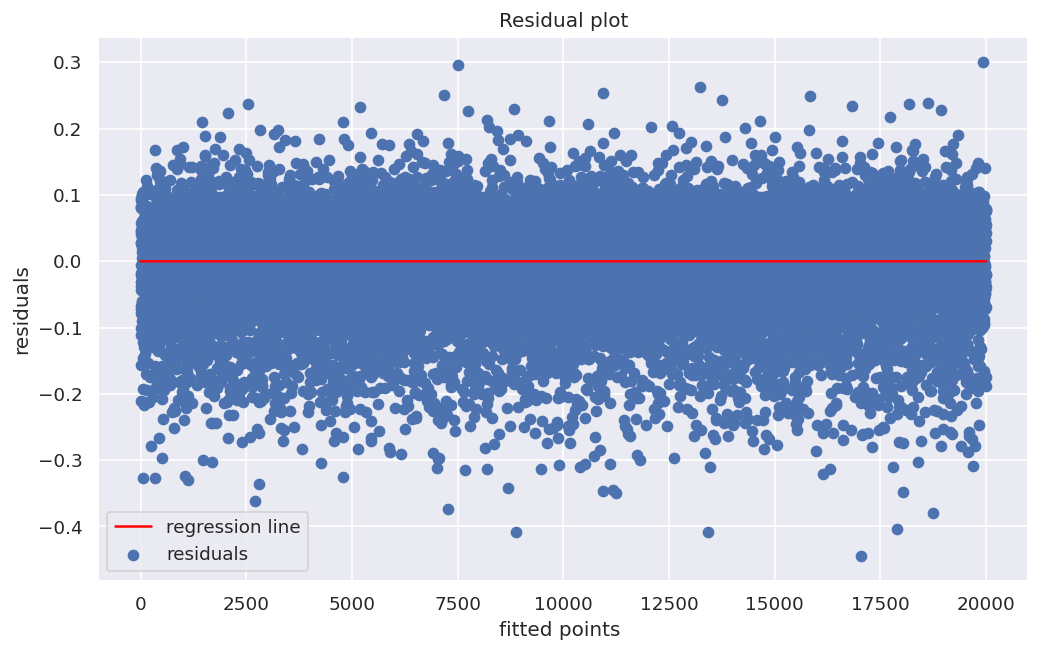

In [127]:
residuals=y_pred_test-y_test

plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
f = range(0,len(y_test))
k = [0 for i in range(0,len(y_test))]
plt.scatter( f, residuals, label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.legend()

**DECISION TREE **

A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes).

In [128]:
# Maximum depth of trees
max_depth = [4,6,8,10]

# Minimum number of samples required to split a node
min_samples_split = [10,20,30]

# Minimum number of samples required at each leaf node
min_samples_leaf = [10,16,20]

# HYperparameter Grid
param_dt = {
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}


In [129]:
dt_model = DecisionTreeRegressor()

# Grid search
dt_grid = GridSearchCV(estimator=dt_model,
                       param_grid = param_dt,
                       cv = 5, verbose=2, scoring='r2')

dt_grid.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=30; total time=   0.2s
[CV] END max_d

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [10, 16, 20],
                         'min_samples_split': [10, 20, 30]},
             scoring='r2', verbose=2)

In [130]:
dt_grid.best_score_

0.6059620607888377

In [131]:
dt_grid.best_score_

0.6059620607888377

In [132]:
dt_grid.best_estimator_

DecisionTreeRegressor(max_depth=10, min_samples_leaf=20, min_samples_split=10)

In [133]:
dt_optimal_model =dt_grid.best_estimator_

In [134]:
y_pred_dt_test=dt_optimal_model.predict(X_test)
y_pred_dt_train=dt_optimal_model.predict(X_train)

In [135]:
y_pred_dt_test=dt_optimal_model.predict(X_test)
y_pred_dt_train=dt_optimal_model.predict(X_train)

MSE : 0.0039 RMSE : 0.06244997998398398
R2 : 0.6410107255184343 Adjusted R2 : 0.6409254442454266


(0.0039, 0.06244997998398398, 0.6410107255184343, 0.6409254442454266)

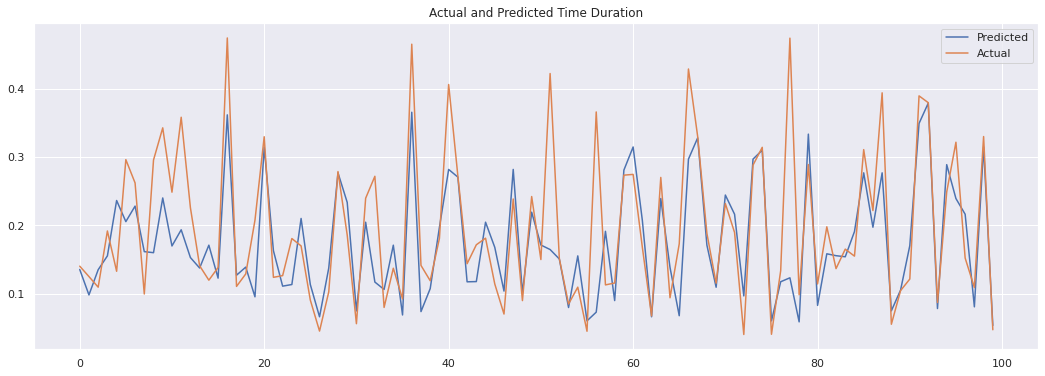

In [136]:
#Evaluation metrics for Train set
EvaluationMetric(X_train,y_train,y_pred_dt_train)

MSE : 0.0042 RMSE : 0.0648074069840786
R2 : 0.6137209540870578 Adjusted R2 : 0.6133536216610145


(0.0042, 0.0648074069840786, 0.6137209540870578, 0.6133536216610145)

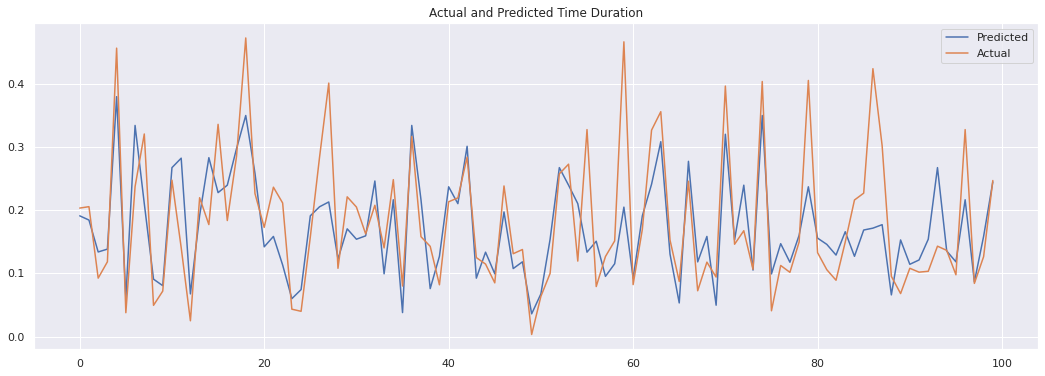

In [137]:
#Evaluation metrics for Test set
EvaluationMetric(X_test,y_test,y_pred_dt_test)

In [138]:
X_train.columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'distance', 'month', 'hour',
       'minute', 'store_and_fwd_flag_N', 'store_and_fwd_flag_Y', 'Day_Friday',
       'Day_Monday', 'Day_Saturday', 'Day_Sunday', 'Day_Thursday',
       'Day_Tuesday', 'Day_Wednesday'],
      dtype='object')

In [139]:
dt_optimal_model.feature_importances_

array([1.16894768e-03, 4.90705771e-05, 9.40686882e-03, 5.26572107e-03,
       1.09879056e-02, 4.92014545e-02, 7.94404425e-01, 7.76421467e-04,
       9.35563974e-02, 2.10160173e-03, 0.00000000e+00, 0.00000000e+00,
       7.14118563e-04, 1.85936653e-03, 1.27615062e-02, 1.66281414e-02,
       4.25445657e-04, 6.06409078e-04, 8.61993020e-05])

In [140]:
importances = dt_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [141]:
importance_df.sort_values(by=['Feature Importance'],ascending=False,inplace=True)
importance_df

Feature  Feature Importance
6               distance            0.794404
8                   hour            0.093556
5       dropoff_latitude            0.049201
15            Day_Sunday            0.016628
14          Day_Saturday            0.012762
4      dropoff_longitude            0.010988
2       pickup_longitude            0.009407
3        pickup_latitude            0.005266
9                 minute            0.002102
13            Day_Monday            0.001859
0              vendor_id            0.001169
7                  month            0.000776
12            Day_Friday            0.000714
17           Day_Tuesday            0.000606
16          Day_Thursday            0.000425
18         Day_Wednesday            0.000086
1        passenger_count            0.000049
11  store_and_fwd_flag_Y            0.000000
10  store_and_fwd_flag_N            0.000000

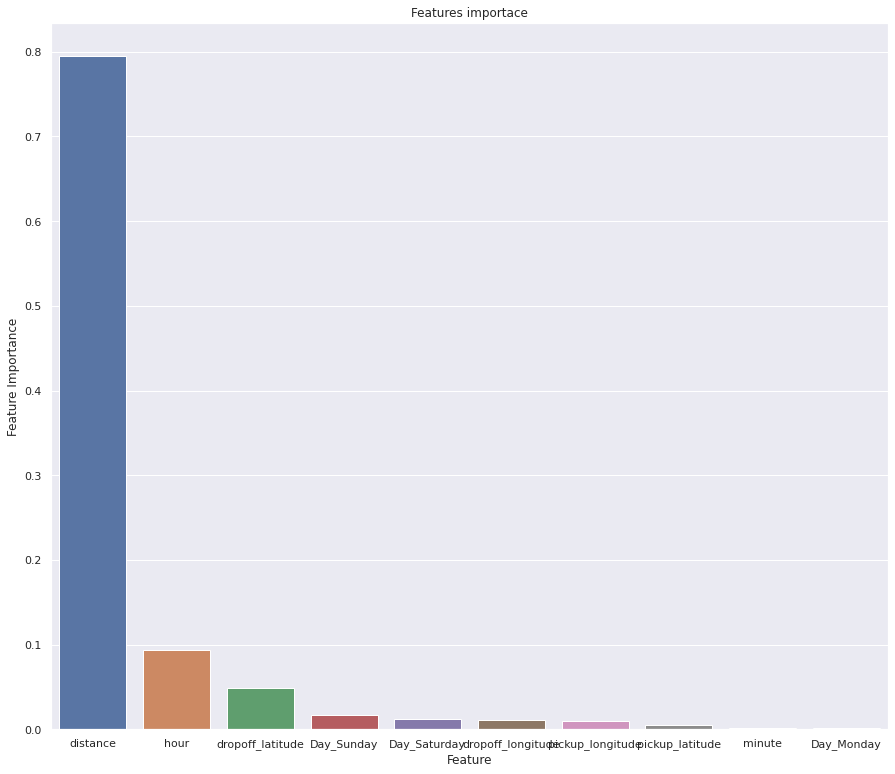

In [142]:
plt.figure(figsize=(15,13))
plt.title('Features importace')
sns.barplot(x='Feature',y="Feature Importance",data=importance_df[:10])

In [143]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [144]:
graph = Source(tree.export_graphviz(dt_optimal_model, out_file=None,feature_names=X_train.columns, filled = True))
display(SVG(graph.pipe(format='svg')))  

**Regularization**

Regularization is a technique used to reduce the errors by fitting the function appropriately on the given training set and avoid overfitting.

**Lasso Regression**

Lasso Regression (Least Absolute Shrinkage and Selection Operator) adds “absolute value of magnitude” of coefficient as penalty term to the loss function.

In [145]:
from sklearn.model_selection import GridSearchCV
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='r2', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='r2')

In [146]:
lasso_regressor.score(X_train, y_train)

0.49602572265298506

In [147]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-05}

Using  {'alpha': 1e-05}  the negative mean squared error is:  0.49569564625243717


In [148]:
y_pred_lasso = lasso_regressor.predict(X_test)
y_pred_lasso_train = lasso_regressor.predict(X_train)

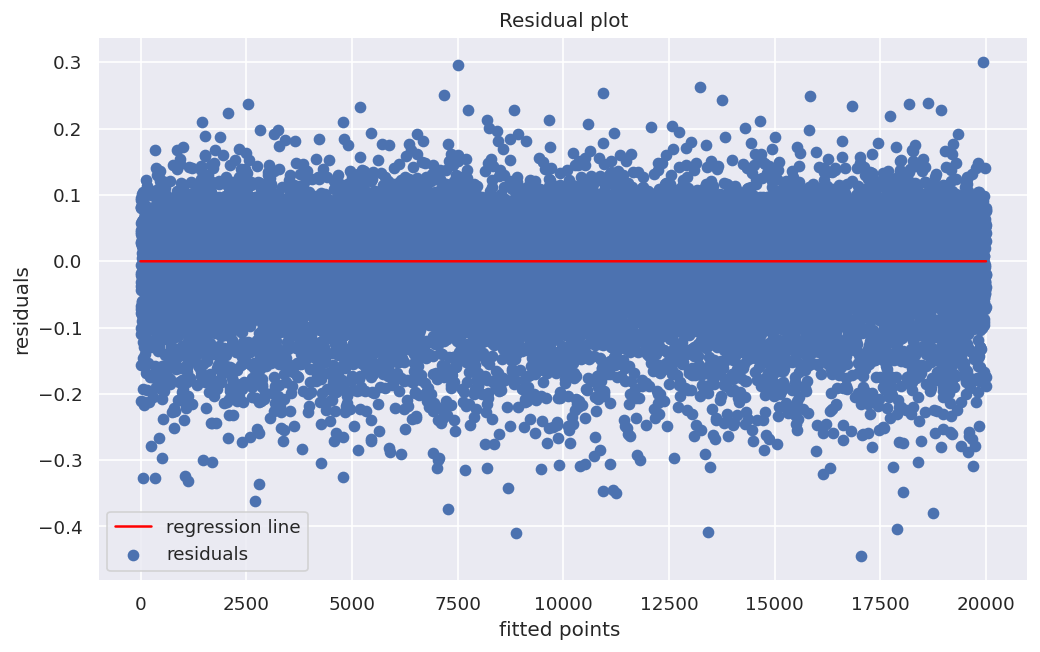

In [149]:
#Heteroskedasticity
residuals=y_pred_lasso-y_test

plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
f = range(0,len(y_test))
k = [0 for i in range(0,len(y_test))]
plt.scatter( f, residuals, label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.legend()

MSE : 0.0055 RMSE : 0.07416198487095663
R2 : 0.49602572265298506 Adjusted R2 : 0.4959059988311597


(0.0055, 0.07416198487095663, 0.49602572265298506, 0.4959059988311597)

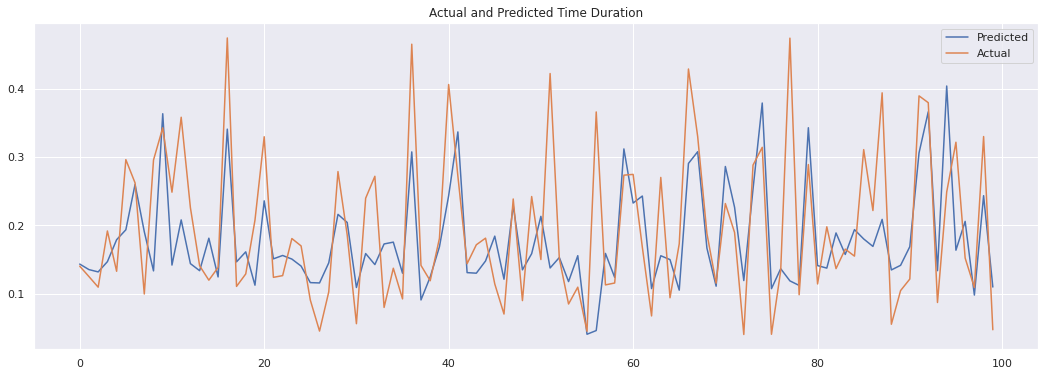

In [150]:
#Evaluation metrics for Train set
EvaluationMetric(X_train,y_train,y_pred_lasso_train)

MSE : 0.0055 RMSE : 0.07416198487095663
R2 : 0.5019085287639401 Adjusted R2 : 0.5014348682057077


(0.0055, 0.07416198487095663, 0.5019085287639401, 0.5014348682057077)

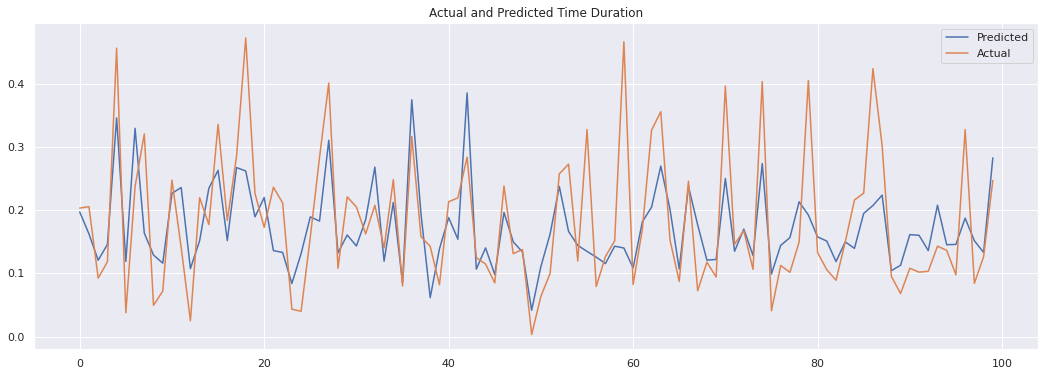

In [151]:
#Evaluation metrics for Test set
EvaluationMetric(X_test,y_test,y_pred_lasso)

**Ridge Regression**
Ridge regression adds “squared magnitude” of coefficient as penalty term to the loss function. Here the highlighted part represents L2 regularization element.

In [152]:
from sklearn.linear_model import Ridge
### Cross validation
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='r2', cv=5)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='r2')

In [153]:
ridge_regressor.score(X_train, y_train)

0.49602571771685555

In [154]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 50}

Using  {'alpha': 50}  the negative mean squared error is:  0.49569564625243717


In [155]:
y_pred_ridge_test = ridge_regressor.predict(X_test)
y_pred_ridge_train=ridge_regressor.predict(X_train)

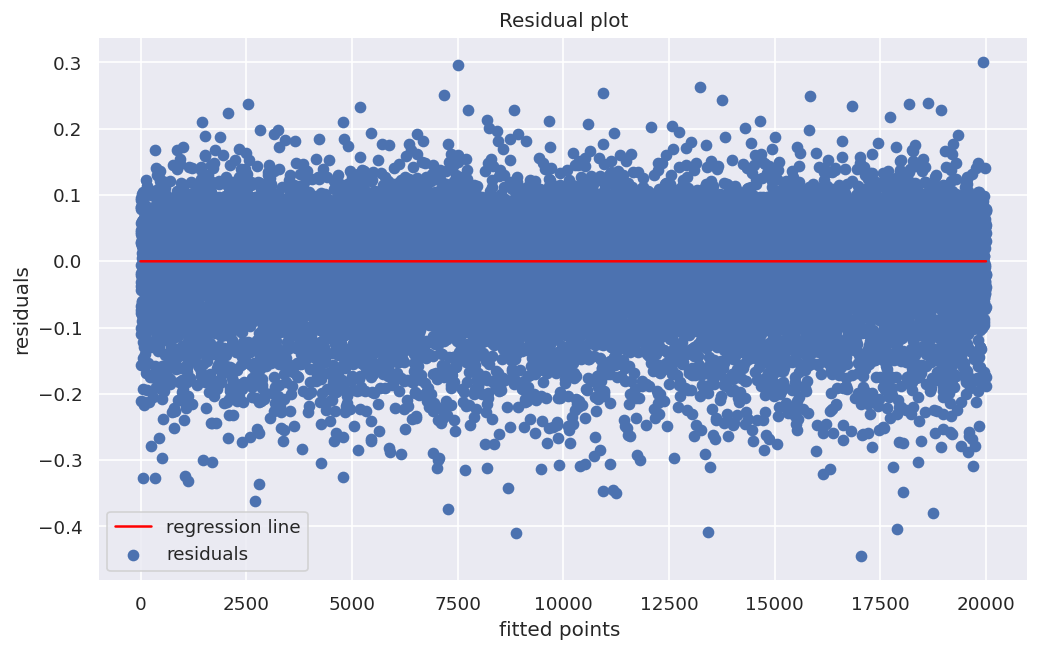

In [156]:
#Heteroskedasticity
residuals=y_pred_ridge_test-y_test

plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
f = range(0,len(y_test))
k = [0 for i in range(0,len(y_test))]
plt.scatter( f, residuals, label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.legend()

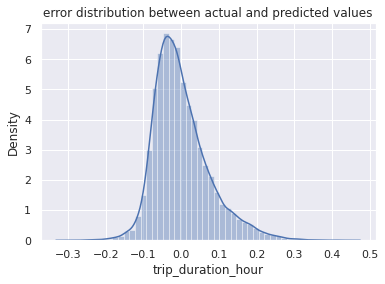

In [157]:
sns.distplot(y_test - y_pred_ridge_test ).set_title("error distribution between actual and predicted values")
plt.show()

**XGBoost**

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way

In [158]:
# Number of trees
n_estimators = [50,100,120]

# Maximum depth of trees
max_depth = [5,7,9]
min_samples_split = [40,50]
#learning_rate=[0.1,0.3,0.5]

# HYperparameter Grid
param_xgb = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
             'min_samples_split':min_samples_split
              }

In [159]:
# Create an instance of the  XGBRegressor
import xgboost as xgb
xgb_model = xgb.XGBRegressor()

# Grid search
xgb_grid = GridSearchCV(estimator=xgb_model,param_grid = param_xgb,cv = 3, verbose=2,scoring="r2")

xgb_grid.fit(X_train,y_train)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[06:59:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END .max_depth=5, min_samples_split=40, n_estimators=50; total time=   4.3s
[06:59:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END .max_depth=5, min_samples_split=40, n_estimators=50; total time=   3.6s
[06:59:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END .max_depth=5, min_samples_split=40, n_estimators=50; total time=   3.6s
[06:59:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=5, min_samples_split=40, n_estimators=100; total time=   8.0s
[06:59:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor o

GridSearchCV(cv=3, estimator=XGBRegressor(),
             param_grid={'max_depth': [5, 7, 9], 'min_samples_split': [40, 50],
                         'n_estimators': [50, 100, 120]},
             scoring='r2', verbose=2)

In [160]:
xgb_grid.best_score_

0.7010293837238288

In [161]:
xgb_grid.best_params_

{'max_depth': 9, 'min_samples_split': 40, 'n_estimators': 120}

In [162]:
xgb_optimal_model =xgb_grid.best_estimator_

In [163]:
y_pred_xgb_test=xgb_optimal_model.predict(X_test)
y_pred_xgb_train=xgb_optimal_model.predict(X_train)

MSE : 0.002 RMSE : 0.044721359549995794
R2 : 0.8191329337122601 Adjusted R2 : 0.8190899670423494


(0.002, 0.044721359549995794, 0.8191329337122601, 0.8190899670423494)

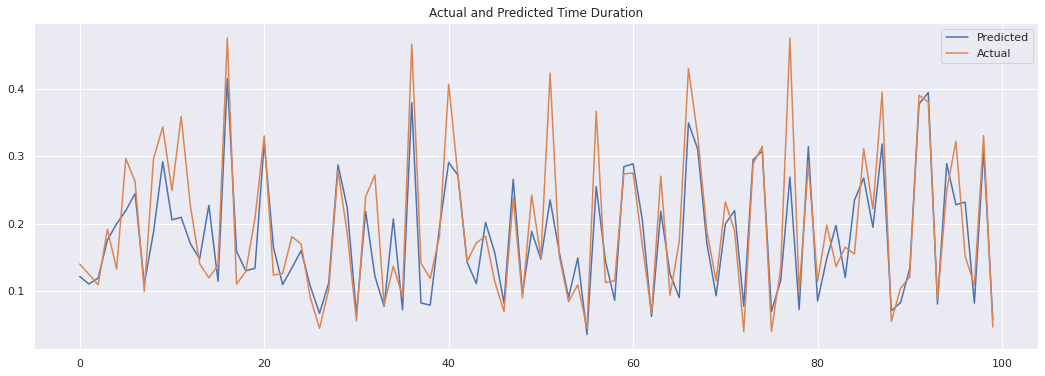

In [164]:
#Evaluation metrics for Train set
EvaluationMetric(X_train,y_train,y_pred_xgb_train)

MSE : 0.0031 RMSE : 0.055677643628300216
R2 : 0.7154664699508024 Adjusted R2 : 0.7151958925198247


(0.0031, 0.055677643628300216, 0.7154664699508024, 0.7151958925198247)

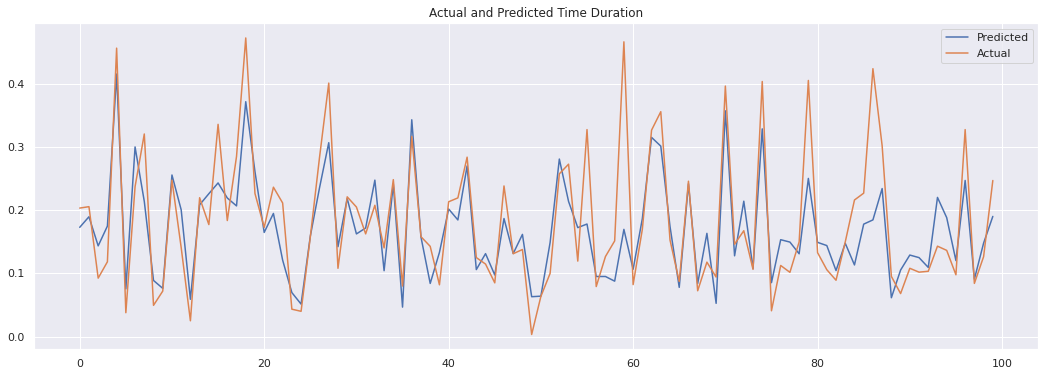

In [165]:
#Evaluation metrics for Test set
EvaluationMetric(X_test,y_test,y_pred_xgb_test)

In [166]:
X_train.columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'distance', 'month', 'hour',
       'minute', 'store_and_fwd_flag_N', 'store_and_fwd_flag_Y', 'Day_Friday',
       'Day_Monday', 'Day_Saturday', 'Day_Sunday', 'Day_Thursday',
       'Day_Tuesday', 'Day_Wednesday'],
      dtype='object')

In [167]:
xgb_optimal_model.feature_importances_

array([0.00530197, 0.00621594, 0.01882293, 0.02015443, 0.02410444,
       0.0408724 , 0.43124527, 0.0188722 , 0.08441121, 0.01070893,
       0.00938304, 0.        , 0.01950253, 0.04961347, 0.07914738,
       0.10235441, 0.02991177, 0.02593901, 0.02343869], dtype=float32)

In [168]:
importances = xgb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [169]:
importance_df.sort_values(by=['Feature Importance'],ascending=False,inplace=True)
importance_df

Feature  Feature Importance
6               distance            0.431245
15            Day_Sunday            0.102354
8                   hour            0.084411
14          Day_Saturday            0.079147
13            Day_Monday            0.049613
5       dropoff_latitude            0.040872
16          Day_Thursday            0.029912
17           Day_Tuesday            0.025939
4      dropoff_longitude            0.024104
18         Day_Wednesday            0.023439
3        pickup_latitude            0.020154
12            Day_Friday            0.019503
7                  month            0.018872
2       pickup_longitude            0.018823
9                 minute            0.010709
10  store_and_fwd_flag_N            0.009383
1        passenger_count            0.006216
0              vendor_id            0.005302
11  store_and_fwd_flag_Y            0.000000

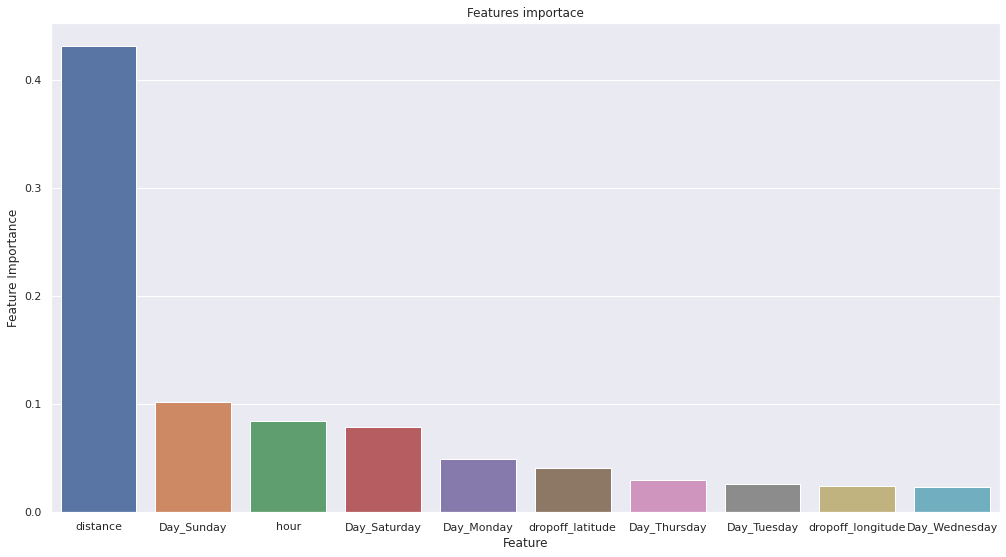

In [170]:
plt.figure(figsize=(17,9))
plt.title('Features importace')
sns.barplot(x='Feature',y="Feature Importance",data=importance_df[:10])

# **GradientBoosting**:
Gradient boosting is a machine learning technique used in regression and classification tasks, among others. It gives a prediction model in the form of an ensemble of weak prediction models, which are typically decision trees.When a decision tree is the weak learner, the resulting algorithm is called gradient-boosted trees

In [171]:
# Number of trees
n_estimators = [100,120]

# Maximum depth of trees
max_depth = [5,8,10]

# Minimum number of samples required to split a node
min_samples_split = [50,80]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]


# HYperparameter Grid
param_gb = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
# Create an instance of the  GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
gb_model=GradientBoostingRegressor()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = param_gb,
                       cv = 3, verbose=2, scoring='r2')

gb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=  24.3s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=  27.1s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=  25.6s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=120; total time=  32.7s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=120; total time=  28.8s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=120; total time=  28.0s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=80, n_estimators=100; total time=  23.4s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=80, n_estimators=100; total time=  23.4s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=80, n_estimators=100; total time=  24.6s
[CV] END max_depth=5,

In [173]:
gb_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 40,
 'min_samples_split': 80,
 'n_estimators': 120}

In [174]:
gb_grid.best_estimator_

GradientBoostingRegressor(max_depth=10, min_samples_leaf=40,
                          min_samples_split=80, n_estimators=120)

In [175]:
gb_optimal_model = gb_grid.best_estimator_

In [176]:
y_preds_gb = gb_optimal_model.predict(X_test)
y_pred_gb_train=gb_optimal_model.predict(X_train)

MSE : 0.0022 RMSE : 0.0469041575982343
R2 : 0.7961842621528883 Adjusted R2 : 0.796135843810564


(0.0022, 0.0469041575982343, 0.7961842621528883, 0.796135843810564)

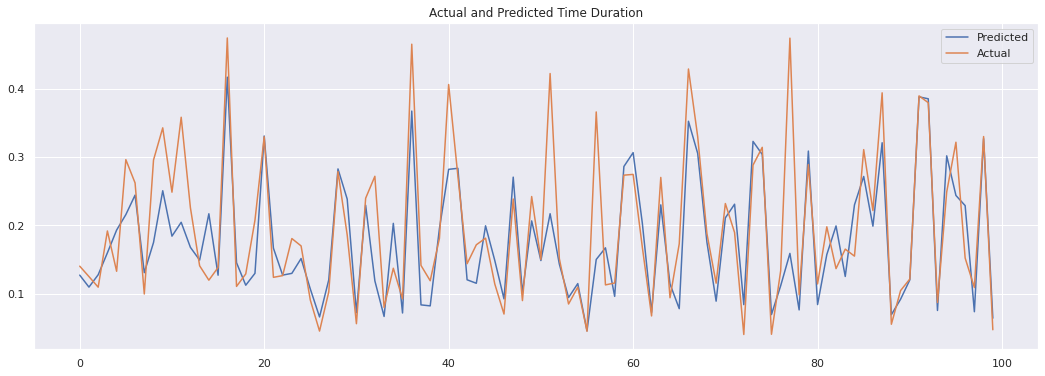

In [177]:
#Evaluation metrics for Train set
EvaluationMetric(X_train,y_train,y_pred_gb_train)

MSE : 0.0031 RMSE : 0.055677643628300216
R2 : 0.7161645962130279 Adjusted R2 : 0.7158946826658832


(0.0031, 0.055677643628300216, 0.7161645962130279, 0.7158946826658832)

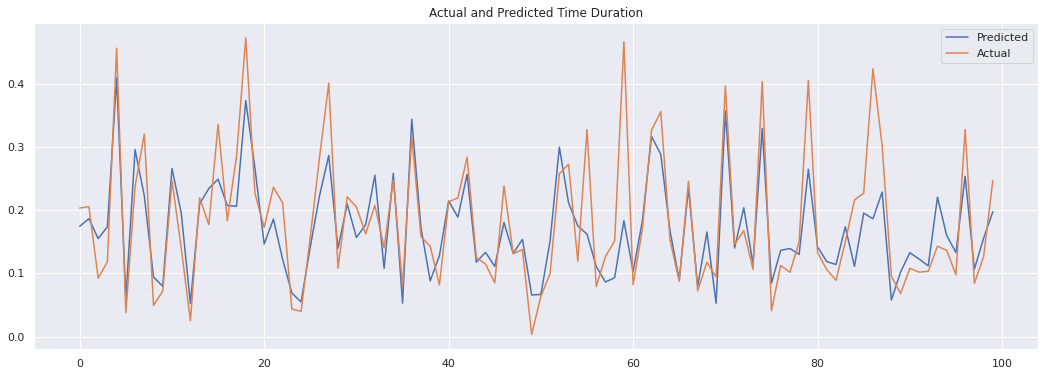

In [178]:
#Evaluation metrics for Test set
EvaluationMetric(X_test,y_test,y_preds_gb)

In [179]:
importances = gb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [180]:
importance_df.sort_values(by=['Feature Importance'],ascending=False,inplace=True)
importance_df

Feature  Feature Importance
6               distance            0.653996
8                   hour            0.089396
5       dropoff_latitude            0.074059
4      dropoff_longitude            0.044333
2       pickup_longitude            0.042924
3        pickup_latitude            0.035433
15            Day_Sunday            0.015438
14          Day_Saturday            0.013904
7                  month            0.008277
9                 minute            0.007722
13            Day_Monday            0.004493
16          Day_Thursday            0.002162
12            Day_Friday            0.002001
0              vendor_id            0.001803
17           Day_Tuesday            0.001709
18         Day_Wednesday            0.001634
1        passenger_count            0.000710
11  store_and_fwd_flag_Y            0.000007
10  store_and_fwd_flag_N            0.000000

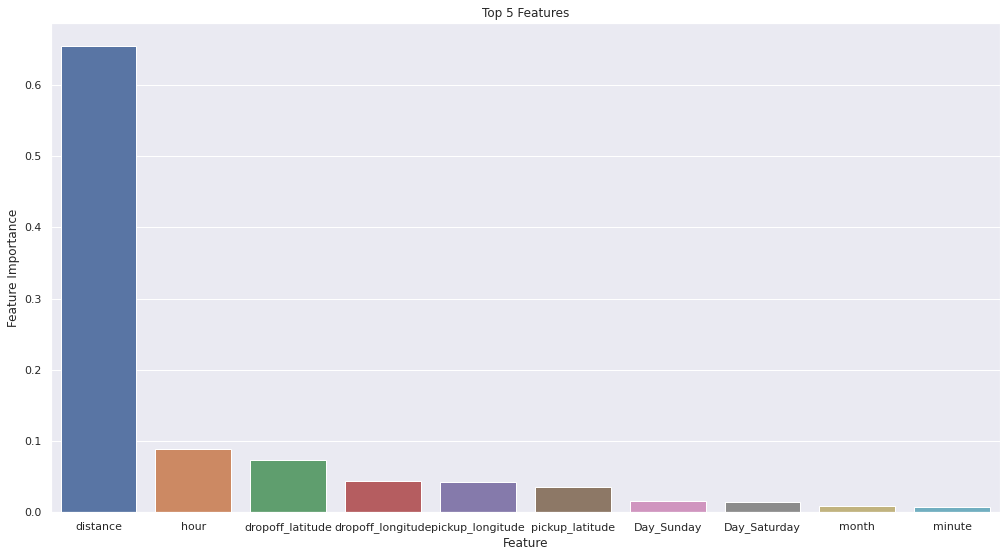

In [181]:
plt.figure(figsize=(17,9))
plt.title('Top 5 Features')
sns.barplot(x='Feature',y="Feature Importance",data=importance_df[:10])



**Observations:**


We can observe that both the models shows somewhat similar learning rate but with visible differences in error rates.

Gradient boosting performed very well out pof all the models

XGBoost training curve on the other hand starts quite low and further improves with the increase in the training size and it too plateau towards the end.

Validation curve seems to show similar trend in both the models i.e. starts very high but improves with the training size with some differences in error rate i.e. XGBoost curve learning is quite fast and more accurate as compared to the RF one.

Both the models seems to suffer from high variance since the training curve error is very less in both the models.

The large gap at the end also indicates that the model suffers from quite a low bias i.e. overfitting the training data.

Also, both the model's still has potential to decrease and converge towards the training curve by the end.

**End Notes**:

In this project we covered various aspects of the Machine learning development cycle. We observed that the data exploration and variable analysis is a very important aspect of the whole cycle and should be done for thorough understanding of the data. We also cleaned the data while exploring as there were some outliers which should be treated before feature engineering. Further we did feature engineering to filter and gather only the optimal features which are more significant and covered most of the variance in the dataset. Then finally we trained the models on the optimum featureset to get the results.